# Inference for neuronal data example 

Algorithms included:

- Kalman
- PMMH (CPMMH with rho = 0 and N = 10)
- CPMMH-0.999-1 (CPMMH with rho = 0.999 and N = 1)
- CPMMH-0.999-5 (CPMMH with rho = 0.999 and N = 5)

### Setput 

Set correct working directory. 

In [1]:
pwd()

"/home/samuel/Documents/projects/cpmmh for sdemems/code/analyses/notebooks"

In [2]:
cd("..") # set correct working directory 
cd("..") 
pwd() # the path should go to the folder with the .git file 

"/home/samuel/Documents/projects/cpmmh for sdemems/code"

Load data and functions 

In [3]:
using Pkg
using Pkg
using PyCall 
PyDict(pyimport("matplotlib")["rcParams"])["ps.useafm"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["pdf.use14corefonts"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["text.usetex"] = [true]
using PyPlot 
using LinearAlgebra
using DataFrames
using KernelDensity  
using LaTeXStrings
using Distributions

save_plots = false 
save_data = false 
run_algorithms = true 

# load functions
include(pwd()*"/src/SDEMEM OU neuron data/ou_sdemem.jl")
#include(pwd()*"/src/SDEMEM OU neuron data/mcmc.jl")


M_subjects = 1

seed = 100 # parse(Int,ARGS[1])

y,prior_parameters_η,prior_parameters_σ_ϵ = set_up(M_subjects,seed); 



┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[3]:4
└ @ Core In[3]:4
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[3]:5
└ @ Core In[3]:5
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[3]:6
└ @ Core In[3]:6


Plot latant process (left) and observed process (rigth).

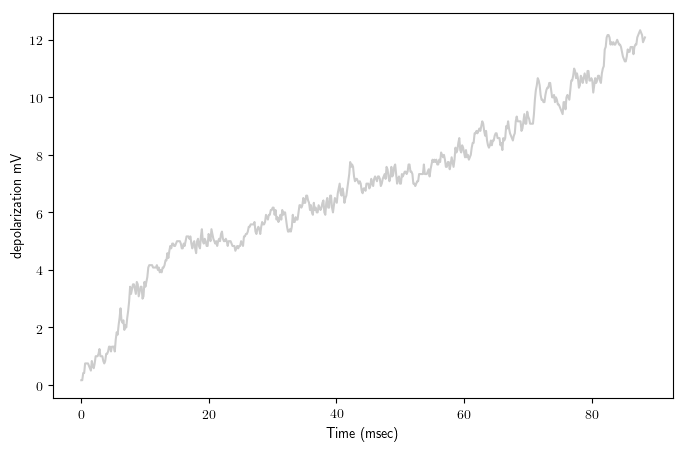

In [4]:
# Plot data (this plot should be similar to Fig 3 in the paper)
PyPlot.figure(figsize=(8,5))
for i in 1:M_subjects
    PyPlot.plot(y[i].mSec, y[i].mV, "k", alpha = 0.2)
end
PyPlot.xlabel("Time (msec)")
PyPlot.ylabel("depolarization mV")


if save_plots
    PyPlot.savefig("figures/neuron_data.pdf", format="pdf", dpi=1000)
    run(`pdftops -eps figures/neuron_data.pdf figures/neuron_data.eps`)
end 

### Algorithm settings 

In [5]:
R = 100000 #15000 #10000
burn_in = 20000

20000

Setting for trace plots.

In [6]:
plot_from_start = true # set to true to plot chains from first iteration
burn_in_trace = 1

if !plot_from_start
    burn_in_trace = burn_in
end

### Run/Load Gibbs sampler with Kalman filter 

In [7]:
job = string(M_subjects) 

"1"

In [8]:
# load stored results
chain_σ_ϵ_kalman = Matrix(CSV.read("data/SDEMEM OU neuron data/kalman/chain_sigma_epsilon_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_σ_ϵ_kalman = Matrix(chain_σ_ϵ_kalman')
chain_η_kalman = Matrix(CSV.read("data/SDEMEM OU neuron data/kalman/chain_eta_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_η_kalman = Matrix(chain_η_kalman')
chain_ϕ_export = Matrix(CSV.read("data/SDEMEM OU neuron data/kalman/chain_phi_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_ϕ_export = Matrix(chain_ϕ_export')
chain_ϕ_kalman = zeros(M_subjects,3,R)
idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_kalman[m,j,:] = chain_ϕ_export[idx,:]
    end 
end 

simdata_kalman = Matrix(CSV.read("data/SDEMEM OU neuron data/kalman/sim_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
println(simdata_kalman[1])
println(simdata_kalman[2])
println(simdata_kalman[3])
println(simdata_kalman[4])


loglik_data = Matrix(CSV.read("data/SDEMEM OU neuron data/kalman/loglik_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto));



┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


15.637631854
0.24849
0.24856
1.0


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


In [9]:
println([mean(chain_σ_ϵ_kalman[burn_in:end]) 0 0;
                         mean(chain_ϕ_kalman[:,:,burn_in:end], dims=3)])

[-3.68384 0.0 0.0; -3.29703 -0.910873 -0.775419]


Print loglik for each iterations

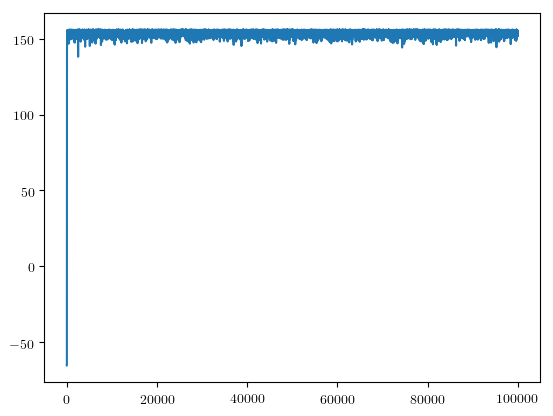

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb9540407f0>

In [10]:
PyPlot.figure()
PyPlot.plot(loglik_data)

Chain for $\sigma_{\epsilon}$. Blue line trace, black dashed line true parameter value.

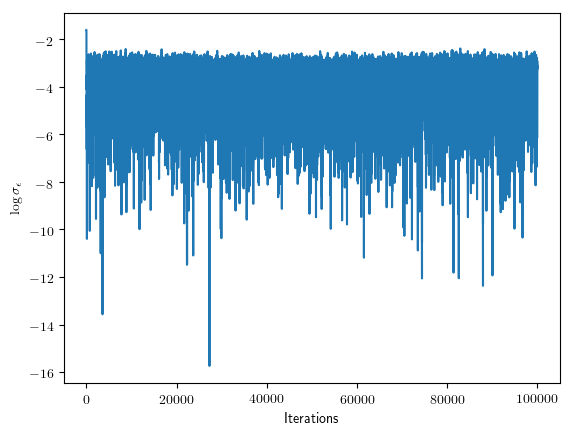

In [11]:
PyPlot.figure()
PyPlot.plot(chain_σ_ϵ_kalman[1,burn_in_trace:end])
PyPlot.ylabel(L"\log \sigma_{\epsilon}")
PyPlot.xlabel("Iterations");

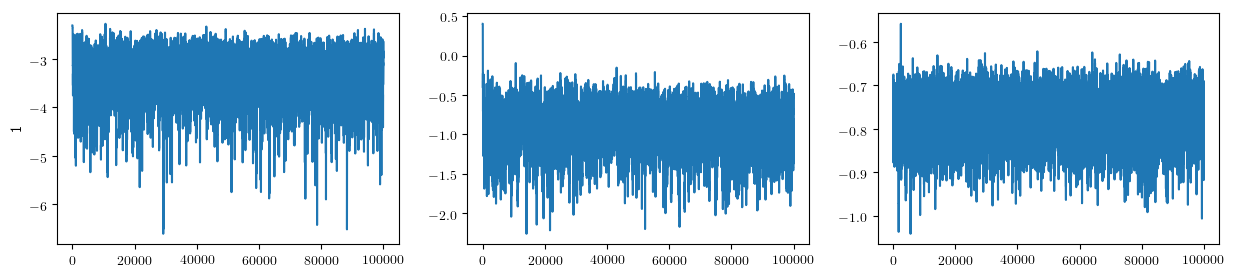

In [12]:
for i in 1:M_subjects
    
    PyPlot.figure(figsize=(15,3))
    
    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(chain_ϕ_kalman[i,1,burn_in_trace:end])
    PyPlot.ylabel(i)

    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(chain_ϕ_kalman[i,2,burn_in_trace:end])

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(chain_ϕ_kalman[i,3,burn_in_trace:end])
end 

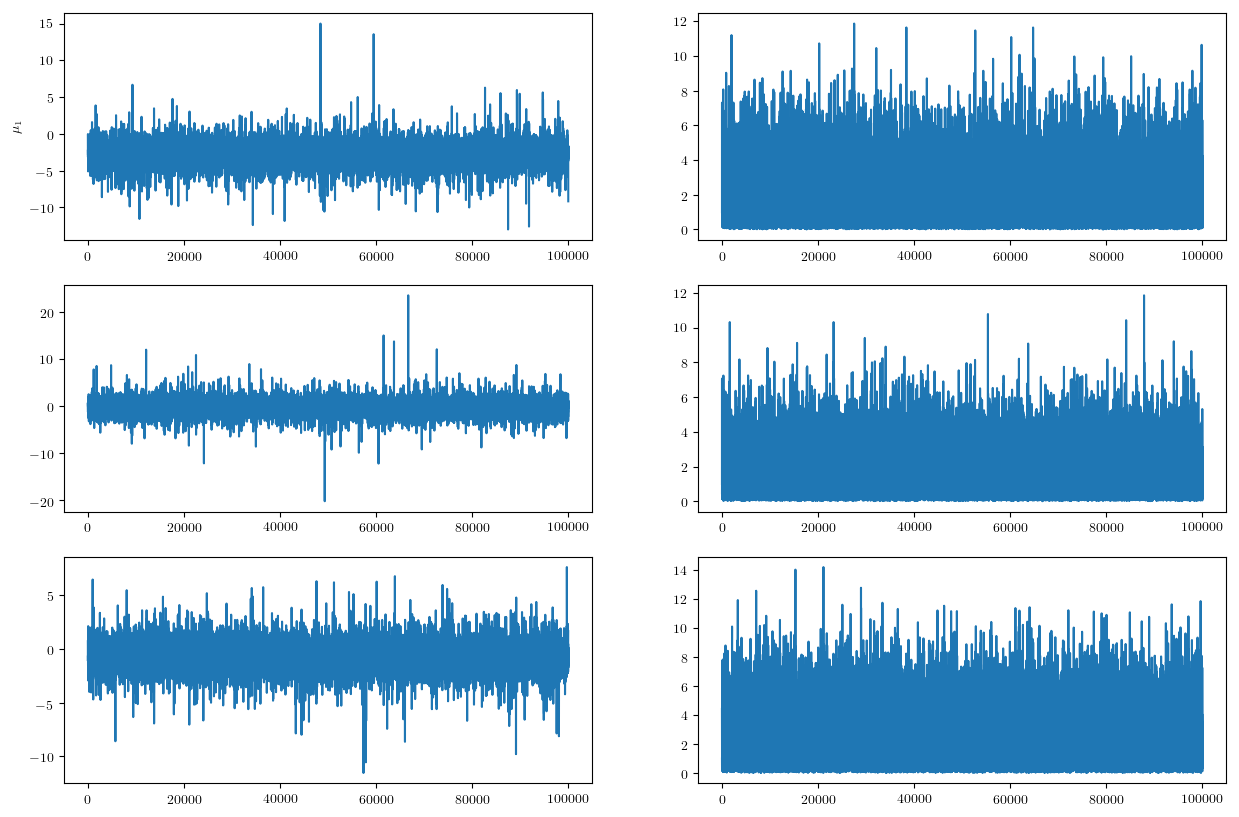

In [13]:
PyPlot.figure(figsize=(15,10))

ax1 = PyPlot.subplot(3,2,1)
PyPlot.plot(chain_η_kalman[1,burn_in_trace:end])
PyPlot.ylabel(L"\mu_1")

ax1 = PyPlot.subplot(3,2,3)
PyPlot.plot(chain_η_kalman[2,burn_in_trace:end])
#PyPlot.ylabel(L"\mu_2")

ax1 = PyPlot.subplot(3,2,5)
PyPlot.plot(chain_η_kalman[3,burn_in_trace:end])
#PyPlot.ylabel(L"\mu_3")
#PyPlot.xlabel("Iterations");

ax1 = PyPlot.subplot(3,2,2)
PyPlot.plot(chain_η_kalman[4,burn_in_trace:end])
#PyPlot.ylabel(L"\tau_1")

ax1 = PyPlot.subplot(3,2,4)
PyPlot.plot(chain_η_kalman[5,burn_in_trace:end])
#PyPlot.ylabel(L"\tau_2")

ax1 = PyPlot.subplot(3,2,6)
PyPlot.plot(chain_η_kalman[6,burn_in_trace:end])
#PyPlot.ylabel(L"\tau_3")
#PyPlot.xlabel("Iterations");

### Run/Load Gibbs with - CPMMH bridge 0.99  - 1

In [39]:
ρ = 0.999
nbr_particles = 5 # 1, 5, 8, 10  # for 100k 1 or 5

job = string(M_subjects)*"_"*string(nbr_particles)*"_"*string(ρ)

"1_5_0.999"

In [40]:
# load stored results
chain_σ_ϵ_cpmmh_bridge = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_sigma_epsilon_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_σ_ϵ_cpmmh_bridge = Matrix(chain_σ_ϵ_cpmmh_bridge')
chain_η_cpmmh_bridge = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_eta_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_η_cpmmh_bridge = Matrix(chain_η_cpmmh_bridge')
chain_ϕ_export_bridge = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_phi_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_ϕ_export_bridge = Matrix(chain_ϕ_export_bridge')
chain_ϕ_cpmmh_bridge = zeros(M_subjects,3,R)
idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_cpmmh_bridge[m,j,:] = chain_ϕ_export_bridge[idx,:]
    end 
end 


simdata_cpmmh = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/sim_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
println(simdata_cpmmh[1])
println(simdata_cpmmh[2])
println(simdata_cpmmh[3])
println(simdata_cpmmh[4])

loglik_data = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/loglik_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto));



┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


286.289240814
0.24608
0.24132
1.0


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


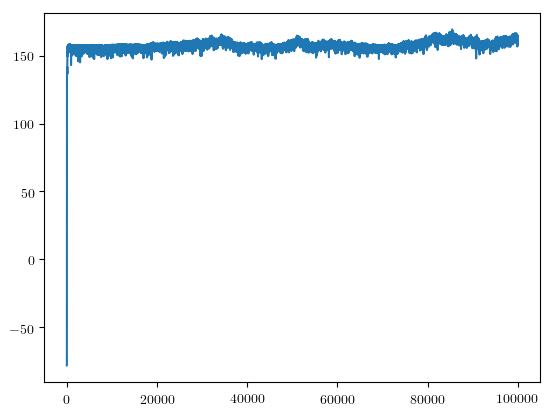

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb91d746588>

In [41]:
PyPlot.figure()
PyPlot.plot(loglik_data)

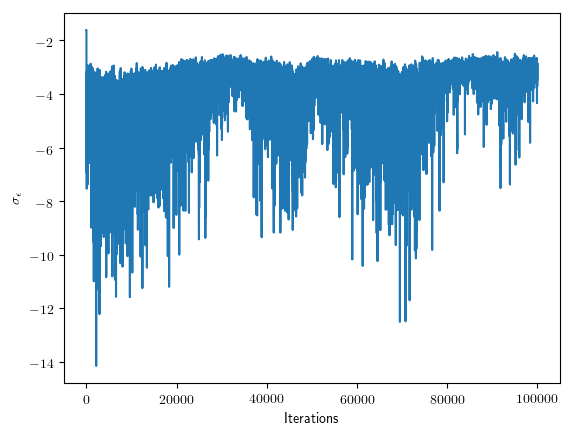

In [42]:
PyPlot.figure()
PyPlot.plot(chain_σ_ϵ_cpmmh_bridge[1,burn_in_trace:end])
PyPlot.ylabel(L"\sigma_{\epsilon}")
PyPlot.xlabel("Iterations");

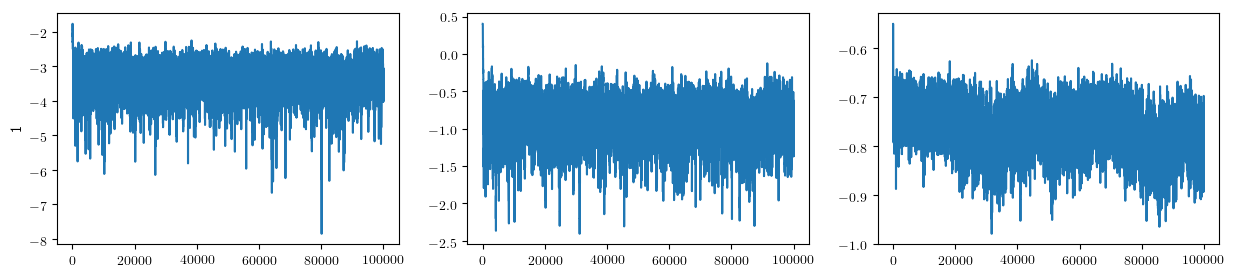

In [43]:
for i in 1:M_subjects
    
    PyPlot.figure(figsize=(15,3))

    
    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(chain_ϕ_cpmmh_bridge[i,1,burn_in_trace:end])
    PyPlot.ylabel(i)
    
    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(chain_ϕ_cpmmh_bridge[i,2,burn_in_trace:end])

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(chain_ϕ_cpmmh_bridge[i,3,burn_in_trace:end])
end 

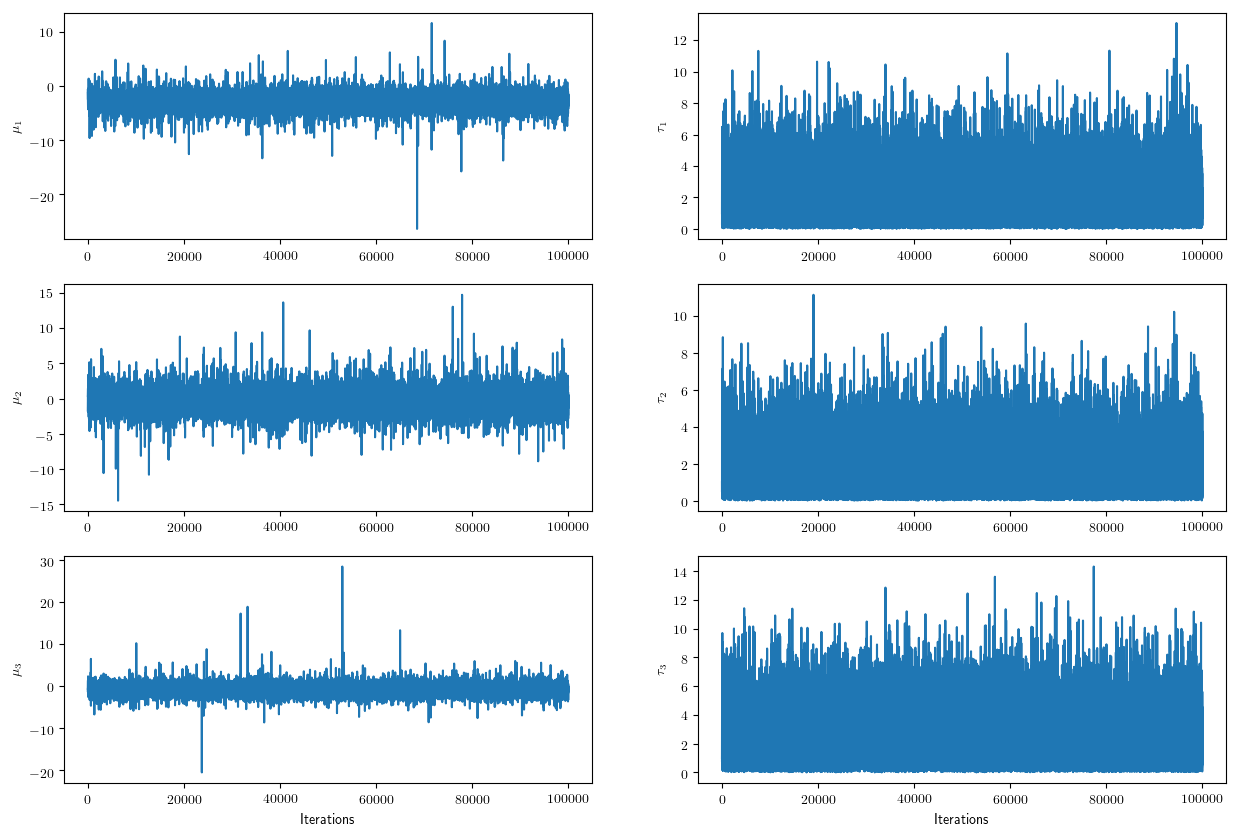

In [44]:
PyPlot.figure(figsize=(15,10))

ax1 = PyPlot.subplot(3,2,1)
PyPlot.plot(chain_η_cpmmh_bridge[1,burn_in_trace:end])
PyPlot.ylabel(L"\mu_1")

ax1 = PyPlot.subplot(3,2,3)
PyPlot.plot(chain_η_cpmmh_bridge[2,burn_in_trace:end])
PyPlot.ylabel(L"\mu_2")

ax1 = PyPlot.subplot(3,2,5)
PyPlot.plot(chain_η_cpmmh_bridge[3,burn_in_trace:end])
PyPlot.ylabel(L"\mu_3")
PyPlot.xlabel("Iterations");

ax1 = PyPlot.subplot(3,2,2)
PyPlot.plot(chain_η_cpmmh_bridge[4,burn_in_trace:end])
PyPlot.ylabel(L"\tau_1")

ax1 = PyPlot.subplot(3,2,4)
PyPlot.plot(chain_η_cpmmh_bridge[5,burn_in_trace:end])
PyPlot.ylabel(L"\tau_2")

ax1 = PyPlot.subplot(3,2,6)
PyPlot.plot(chain_η_cpmmh_bridge[6,burn_in_trace:end])
PyPlot.ylabel(L"\tau_3")
PyPlot.xlabel("Iterations");

### Run/Load Gibbs with PMMH - CPMMH bridge 0.0  - 10

In [20]:
ρ = 0.0
nbr_particles = 10

job = string(M_subjects)*"_"*string(nbr_particles)*"_"*string(ρ)


"1_10_0.0"

In [21]:
chain_σ_ϵ_pmmh = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_sigma_epsilon_"*string(seed)*"_"*job*".csv",allowmissing=:auto))

chain_σ_ϵ_pmmh = Matrix(chain_σ_ϵ_pmmh')
chain_η_pmmh = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_eta_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_η_pmmh = Matrix(chain_η_pmmh')
chain_ϕ_export_pmmh = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/chain_phi_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
chain_ϕ_export_pmmh = Matrix(chain_ϕ_export_pmmh')
chain_ϕ_pmmh = zeros(M_subjects,3,R)

idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_pmmh[m,j,:] = chain_ϕ_export_pmmh[idx,:]
    end 
end 


simdata_cpmmh = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/sim_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto))
println(simdata_cpmmh[1])
println(simdata_cpmmh[2])
println(simdata_cpmmh[3])
println(simdata_cpmmh[4])

loglik_data = Matrix(CSV.read("data/SDEMEM OU neuron data/cpmmh/loglik_data_"*string(seed)*"_"*job*".csv",allowmissing=:auto));





┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


391.32629476
0.24697
0.25207
1.0


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/YgNdL/src/CSV.jl:263


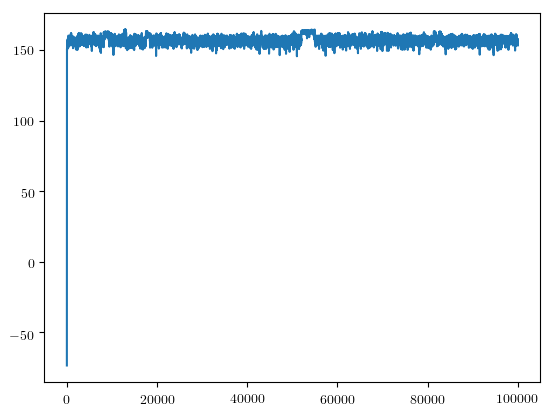

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb91d071630>

In [22]:
PyPlot.figure()
PyPlot.plot(loglik_data)

In [23]:
var(loglik_data[500:end])

5.441066538145616

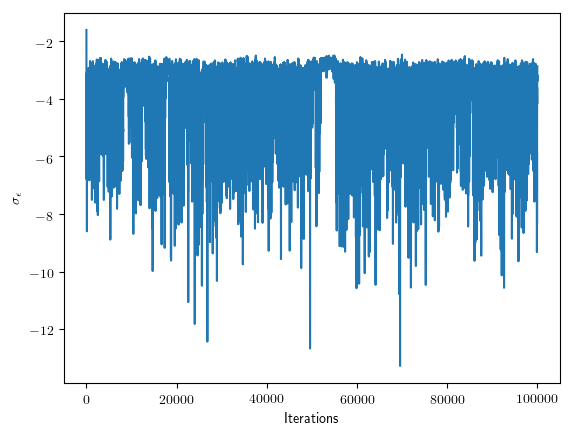

In [24]:
PyPlot.figure()
PyPlot.plot(chain_σ_ϵ_pmmh[1,burn_in_trace:end])
PyPlot.ylabel(L"\sigma_{\epsilon}")
PyPlot.xlabel("Iterations");

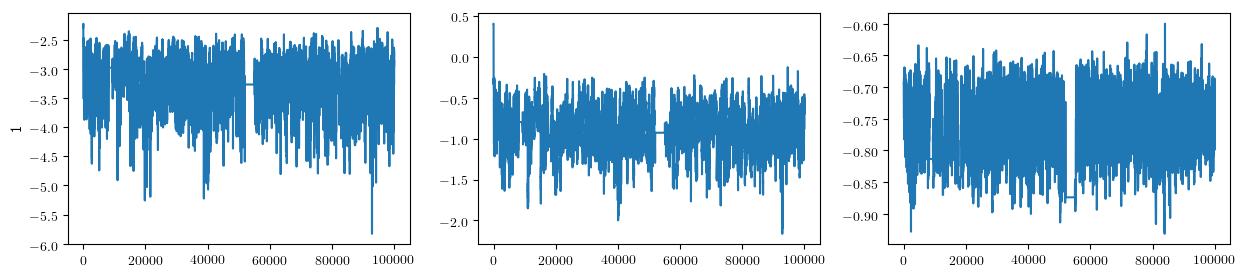

In [25]:
for i in 1:M_subjects
    
    PyPlot.figure(figsize=(15,3))

    
    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(chain_ϕ_pmmh[i,1,burn_in_trace:end])
    PyPlot.ylabel(i)
    
    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(chain_ϕ_pmmh[i,2,burn_in_trace:end])

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(chain_ϕ_pmmh[i,3,burn_in_trace:end])
end 


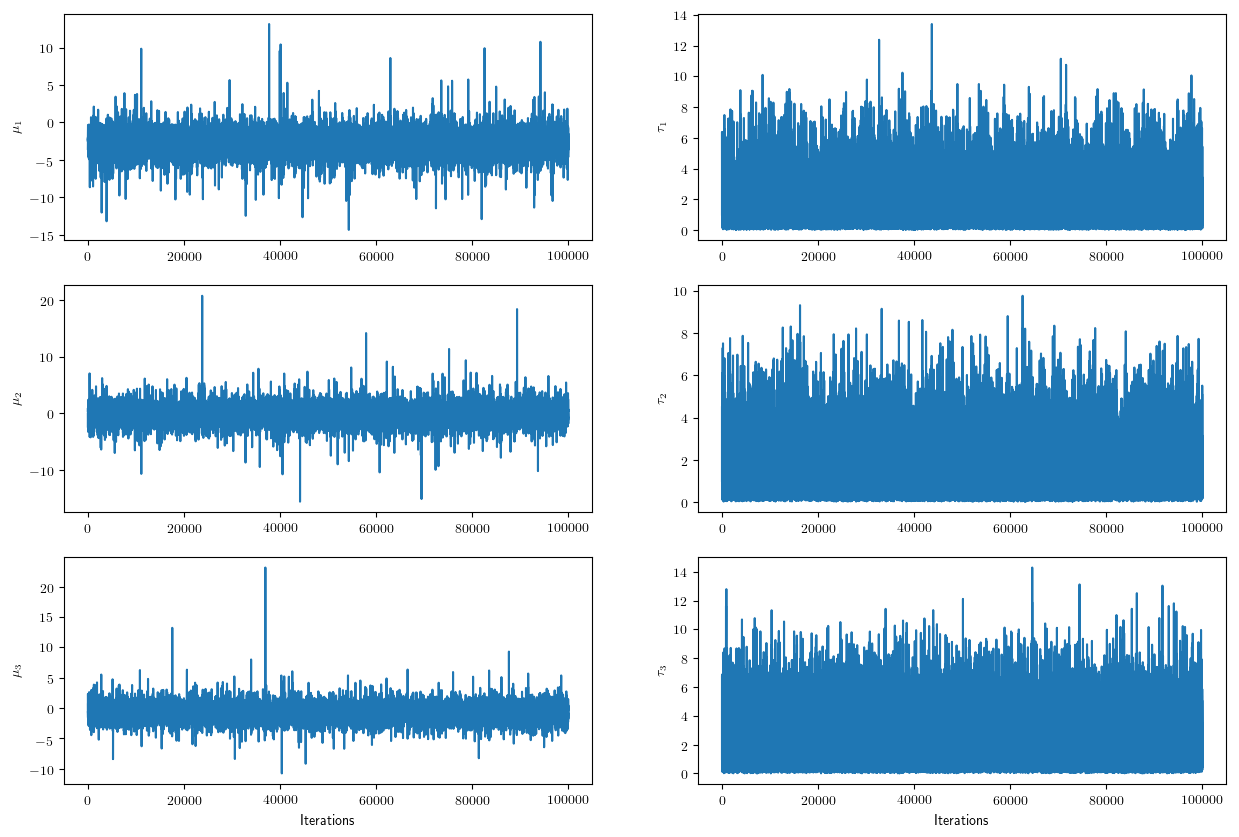

In [26]:
PyPlot.figure(figsize=(15,10))

ax1 = PyPlot.subplot(3,2,1)
PyPlot.plot(chain_η_pmmh[1,burn_in_trace:end])
PyPlot.ylabel(L"\mu_1")

ax1 = PyPlot.subplot(3,2,3)
PyPlot.plot(chain_η_pmmh[2,burn_in_trace:end])
PyPlot.ylabel(L"\mu_2")

ax1 = PyPlot.subplot(3,2,5)
PyPlot.plot(chain_η_pmmh[3,burn_in_trace:end])
PyPlot.ylabel(L"\mu_3")
PyPlot.xlabel("Iterations");

ax1 = PyPlot.subplot(3,2,2)
PyPlot.plot(chain_η_pmmh[4,burn_in_trace:end])
PyPlot.ylabel(L"\tau_1")

ax1 = PyPlot.subplot(3,2,4)
PyPlot.plot(chain_η_pmmh[5,burn_in_trace:end])
PyPlot.ylabel(L"\tau_2")

ax1 = PyPlot.subplot(3,2,6)
PyPlot.plot(chain_η_pmmh[6,burn_in_trace:end])
PyPlot.ylabel(L"\tau_3")
PyPlot.xlabel("Iterations");

# Plots

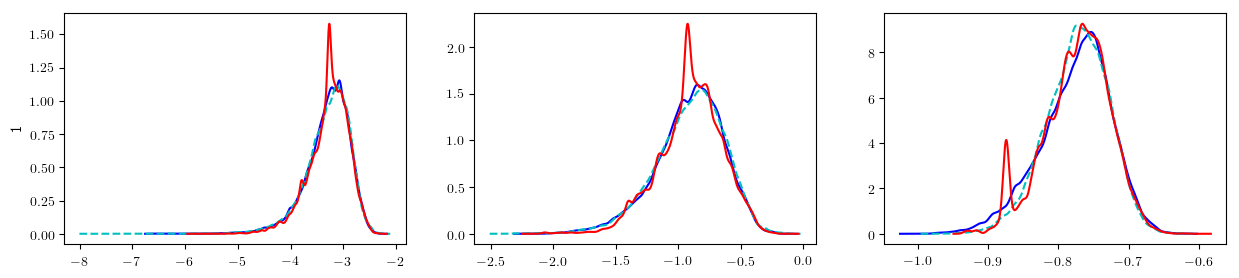

In [47]:
for m in 1:M_subjects
    
    posterior_kalman1 = kde(chain_ϕ_kalman[m,1,burn_in:end])
    posterior_bridge1 = kde(chain_ϕ_cpmmh_bridge[m,1,burn_in:end])
    posterior_pmmh1 = kde(chain_ϕ_pmmh[m,1,burn_in:end])

    posterior_kalman2 = kde(chain_ϕ_kalman[m,2,burn_in:end])
    posterior_bridge2 = kde(chain_ϕ_cpmmh_bridge[m,2,burn_in:end])
    posterior_pmmh2 = kde(chain_ϕ_pmmh[m,2,burn_in:end])

    posterior_kalman3 = kde(chain_ϕ_kalman[m,3,burn_in:end])
    posterior_bridge3 = kde(chain_ϕ_cpmmh_bridge[m,3,burn_in:end])
    posterior_pmmh3 = kde(chain_ϕ_pmmh[m,3,burn_in:end])

    
    PyPlot.figure(figsize=(15,3))

    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(posterior_kalman1.x,posterior_kalman1.density, "b")        
    PyPlot.plot(posterior_bridge1.x,posterior_bridge1.density, "--c")
    PyPlot.plot(posterior_pmmh1.x,posterior_pmmh1.density, "r")
    
    PyPlot.ylabel(m)
    
    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(posterior_kalman2.x,posterior_kalman2.density, "b")        
    PyPlot.plot(posterior_bridge2.x,posterior_bridge2.density, "--c")
    PyPlot.plot(posterior_pmmh2.x,posterior_pmmh2.density, "r")

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(posterior_kalman3.x,posterior_kalman3.density, "b")        
    PyPlot.plot(posterior_bridge3.x,posterior_bridge3.density, "--c")
    PyPlot.plot(posterior_pmmh3.x,posterior_pmmh3.density, "r")


end

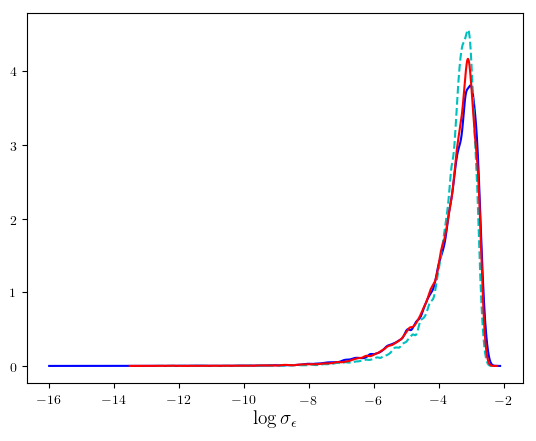

PyObject Text(0.5,29,'$\\log \\sigma_{\\epsilon}$')

In [46]:

prior_grid = LinRange(-13,1,100)
prior = pdf.(Normal(prior_parameters_σ_ϵ[1],1/prior_parameters_σ_ϵ[2]),prior_grid)

burn_in_cppmh = 5000
# TODO scaling????

scale_factor = 5
posterior_kalman = kde(chain_σ_ϵ_kalman[burn_in:end])
posterior_bridge = kde(chain_σ_ϵ_cpmmh_bridge[burn_in:end])
posterior_pmmh = kde(chain_σ_ϵ_pmmh[burn_in:end])


PyPlot.figure()
#PyPlot.plot(prior_grid,prior, "k")
PyPlot.plot(posterior_kalman.x,scale_factor*posterior_kalman.density, "b")
PyPlot.plot(posterior_bridge.x,scale_factor*posterior_bridge.density, "--c")
PyPlot.plot(posterior_pmmh.x,scale_factor*posterior_pmmh.density, "r")

PyPlot.xlabel(L"\log \sigma_{\epsilon}",fontsize=14)


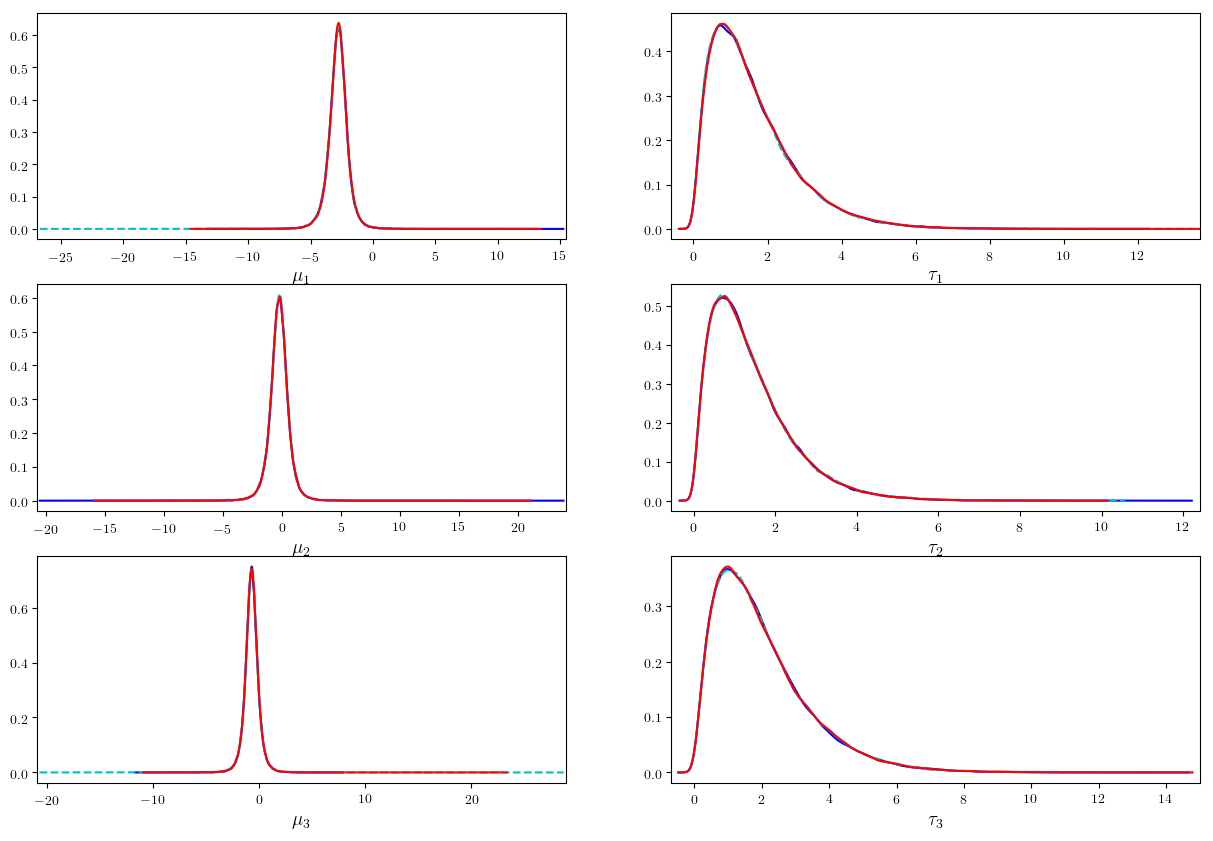

In [45]:

prior_grid_tau = LinRange(0,8,100)
prior_grid_tau2 = LinRange(0,20,100)

prior_tau1 = pdf.(Gamma(prior_parameters_η[1,3],1/prior_parameters_η[1,4]),prior_grid_tau)
prior_tau2 = pdf.(Gamma(prior_parameters_η[2,3],1/prior_parameters_η[2,4]),prior_grid_tau2)
prior_tau3 = pdf.(Gamma(prior_parameters_η[3,3],1/prior_parameters_η[3,4]),prior_grid_tau)

prior_grid_mu1 = prior_grid = LinRange(-6, -1,100)
prior_grid_mu2 = prior_grid = LinRange(-2,0,100)
prior_grid_mu3 = prior_grid = LinRange(-3,0,100)


tau1 = prior_parameters_η[1,3]/prior_parameters_η[1,4]
tau2 = prior_parameters_η[2,3]/prior_parameters_η[2,4]
tau3 = prior_parameters_η[3,3]/prior_parameters_η[3,4]

prior_mu1 = pdf.(Normal(prior_parameters_η[1,1],sqrt(1/(prior_parameters_η[1,2]*tau1))),prior_grid_mu1)
prior_mu2 = pdf.(Normal(prior_parameters_η[2,1],sqrt(1/(prior_parameters_η[2,2]*tau2))),prior_grid_mu2)
prior_mu3 = pdf.(Normal(prior_parameters_η[3,1],sqrt(1/(prior_parameters_η[3,2]*tau3))),prior_grid_mu3)

posterior_kalman1 = kde(chain_η_kalman[1,burn_in:end])
posterior_bridge1 = kde(chain_η_cpmmh_bridge[1,burn_in:end])
posterior_pmmh1 = kde(chain_η_pmmh[1,burn_in:end])

posterior_kalman2 = kde(chain_η_kalman[2,burn_in:end])
posterior_bridge2 = kde(chain_η_cpmmh_bridge[2,burn_in:end])
posterior_pmmh2 = kde(chain_η_pmmh[2,burn_in:end])

posterior_kalman3 = kde(chain_η_kalman[3,burn_in:end])
posterior_bridge3 = kde(chain_η_cpmmh_bridge[3,burn_in:end])
posterior_pmmh3 = kde(chain_η_pmmh[3,burn_in:end])

posterior_kalman4 = kde(chain_η_kalman[4,burn_in:end])
posterior_bridge4 = kde(chain_η_cpmmh_bridge[4,burn_in:end])
posterior_pmmh4 = kde(chain_η_pmmh[4,burn_in:end])

posterior_kalman5 = kde(chain_η_kalman[5,burn_in:end])
posterior_bridge5 = kde(chain_η_cpmmh_bridge[5,burn_in:end])
posterior_pmmh5 = kde(chain_η_pmmh[5,burn_in:end])

posterior_kalman6 = kde(chain_η_kalman[6,burn_in:end])
posterior_bridge6 = kde(chain_η_cpmmh_bridge[6,burn_in:end])
posterior_pmmh6 = kde(chain_η_pmmh[6,burn_in:end])

PyPlot.figure(figsize=(15,10))

ax1 = PyPlot.subplot(3,2,1)
#PyPlot.plot(prior_grid_mu1,prior_mu1, "k")
PyPlot.plot(posterior_kalman1.x,posterior_kalman1.density, "b")        
PyPlot.plot(posterior_bridge1.x,posterior_bridge1.density, "c--")
PyPlot.plot(posterior_pmmh1.x,posterior_pmmh1.density, "r")

PyPlot.xlim((minimum([minimum(posterior_kalman1.x);
             minimum(posterior_bridge1.x)])-0.2, maximum([maximum(posterior_kalman1.x);
                                                         maximum(posterior_bridge1.x)])+0.2));
PyPlot.xlabel(L"\mu_1",fontsize=14)


ax1 = PyPlot.subplot(3,2,3)
#PyPlot.plot(prior_grid_mu2,prior_mu2, "k")
PyPlot.plot(posterior_kalman2.x,posterior_kalman2.density, "b")        
PyPlot.plot(posterior_bridge2.x,posterior_bridge2.density, "c--")
PyPlot.plot(posterior_pmmh2.x,posterior_pmmh2.density, "r")
PyPlot.xlim((minimum([minimum(posterior_kalman2.x);
             minimum(posterior_bridge2.x)])-0.2, maximum([maximum(posterior_kalman2.x);
                                                         maximum(posterior_bridge2.x)])+0.2));
PyPlot.xlabel(L"\mu_2",fontsize=14)



ax1 = PyPlot.subplot(3,2,5)
#PyPlot.plot(prior_grid_mu3,prior_mu3, "g")
PyPlot.plot(posterior_kalman3.x,posterior_kalman3.density, "b")        
PyPlot.plot(posterior_bridge3.x,posterior_bridge3.density, "c--")
PyPlot.plot(posterior_pmmh3.x,posterior_pmmh3.density, "r")
PyPlot.xlim((minimum([minimum(posterior_kalman3.x);
             minimum(posterior_bridge3.x)])-0.2, maximum([maximum(posterior_kalman3.x);
                                                         maximum(posterior_bridge3.x)])+0.2));
PyPlot.xlabel(L"\mu_3",fontsize=14)


ax1 = PyPlot.subplot(3,2,2)
#PyPlot.plot(prior_grid_tau,prior_tau1, "k")
PyPlot.plot(posterior_kalman4.x,posterior_kalman4.density, "b")        
PyPlot.plot(posterior_bridge4.x,posterior_bridge4.density, "c--")
PyPlot.plot(posterior_pmmh4.x,posterior_pmmh4.density, "r")
PyPlot.xlim((minimum([minimum(posterior_kalman4.x);
             minimum(posterior_bridge4.x)])-0.2, maximum([maximum(posterior_kalman4.x);
                                                         maximum(posterior_bridge4.x)])+0.2));
PyPlot.xlabel(L"\tau_1",fontsize=14)


ax1 = PyPlot.subplot(3,2,4)
#PyPlot.plot(prior_grid_tau2,prior_tau2, "k")
PyPlot.plot(posterior_kalman5.x,posterior_kalman5.density, "b")        
PyPlot.plot(posterior_bridge5.x,posterior_bridge5.density, "c--")
PyPlot.plot(posterior_pmmh5.x,posterior_pmmh5.density, "r")
PyPlot.xlim((minimum([minimum(posterior_kalman5.x);
             minimum(posterior_bridge5.x)])-0.2, maximum([maximum(posterior_kalman5.x);
                                                         maximum(posterior_bridge5.x)])+0.2));
PyPlot.xlabel(L"\tau_2",fontsize=14)
    

ax1 = PyPlot.subplot(3,2,6)
#PyPlot.plot(prior_grid_tau,prior_tau3, "k")
PyPlot.plot(posterior_kalman6.x,posterior_kalman6.density, "b")        
PyPlot.plot(posterior_bridge6.x,posterior_bridge6.density, "c--")
PyPlot.plot(posterior_pmmh6.x,posterior_pmmh6.density, "r")
PyPlot.xlim((minimum([minimum(posterior_kalman6.x);
             minimum(posterior_bridge6.x)])-0.2, maximum([maximum(posterior_kalman6.x);
                                                         maximum(posterior_bridge6.x)])+0.2));
PyPlot.xlabel(L"\tau_3",fontsize=14);

